### Глава 5. Линейная регресси | Упражнения

1. Выполните простую линейную регрессию, чтобы найти значения m и b, которые минимизируют потери (сумму квадратов остатков).

m = [1.75919315]
b = [4.69359655]


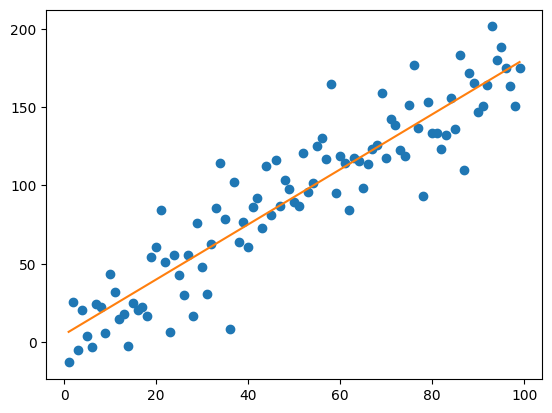

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LinearRegression()

fit = model.fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f"m = {m}")
print(f"b = {b}")

plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()



2. Рассчитайте коэффициент корреляции и статическую значимость этих данных (на доверительном интервале 95%). Значима ли корреляци?

In [24]:
from scipy.stats import t
from math import sqrt

correlations = df.corr(method='pearson')

print(correlations)

n = df.shape[0]
print(n)

lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

r = correlations['y']['x']
print(r)

test_value = r / sqrt((1-r**2)/(n-2))

print(f"Тестовое значение (t-статистика): {test_value}")
print(f"Критический интервал: {lower_cv}, {upper_cv}")

if test_value < lower_cv or test_value > upper_cv:
    print("Корреляция обоснована, отвергаем H₀")
else:
    print("Корреляция не обоснована, нельзя отвергнуть H₀")

# Вычисляем p-значение
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# Двусторонний тест, поэтому умножаем на 2
p_value = p_value * 2
print(f"p-значение: {p_value}")

         x        y
x  1.00000  0.92421
y  0.92421  1.00000
99
0.924210062867716
Тестовое значение (t-статистика): 23.835515323677328
Критический интервал: -1.9844674544266925, 1.984467454426692
Корреляция обоснована, отвергаем H₀
p-значение: 0.0


3. Каков 95 %-ный интервал прогнозирования для прогнозируемого значения **y** при **x=50**?

In [30]:
n = df.shape[0]

x_0 = 50
x_mean = df.mean(axis=1).mean()

t_value = t(n-2).ppf(.975)

standard_error = sqrt(sum((p[1] - (m * p[0] + b)) ** 2 for p in df.values) / (n - 2))

margin_of_error = t_value * standard_error * \
 sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
 (n * sum(p[0] ** 2 for p in df.values) - \
 sum(p[0] for p in df.values) ** 2))

predicted_y = m*x_0 + b
print(predicted_y)
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

[92.65325395]
[50.67567985] [134.63082806]


C:\Users\pc_ni\AppData\Local\Temp\ipykernel_13460\846389671.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  standard_error = sqrt(sum((p[1] - (m * p[0] + b)) ** 2 for p in df.values) / (n - 2))


4. Начните регрессию заново и разделите данные на обучающую и тестовую выборки. Не стесняйтесь экспериментировать с перекрестной и случайной валидацией. Насколько хорошо и стабильно работает линейная регрессия на тестовых данных? Почему так?

R² = 0.889


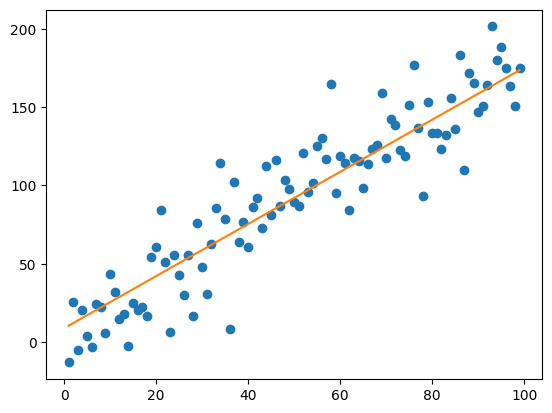

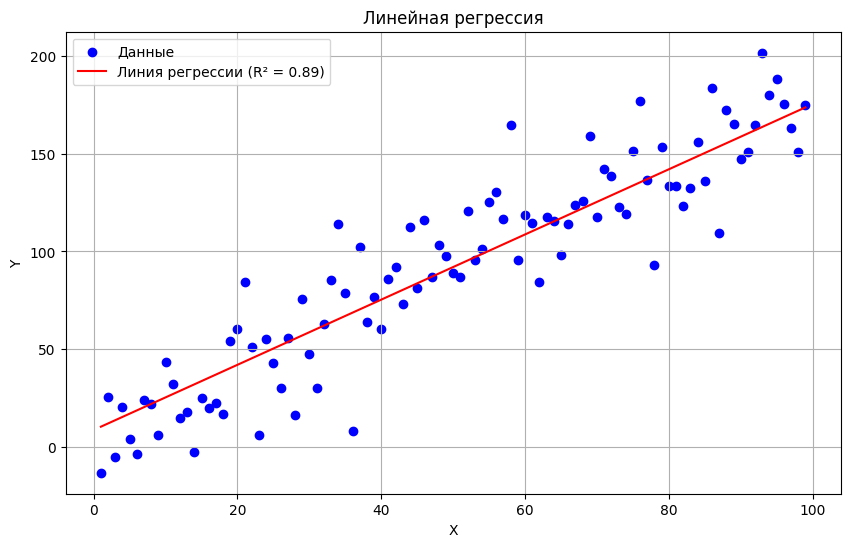

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
fit = model.fit(X_train, Y_train)

m = fit.coef_[0]
b = fit.intercept_

r2 = model.score(X_test, Y_test)
print(f"R² = {r2:.3f}")

plt.plot(X, Y, 'o')
plt.plot(X, m * X + b)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Данные', color='blue')
plt.plot(X, model.predict(X), color='red', label=f'Линия регрессии (R² = {r2:.2f})')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

R² = 0.89 

**Интерпретация:** 89% вариации в данных объясняется моделью, остальное 11% - это может быть шум, ошибка измерений или недостающие факторы.

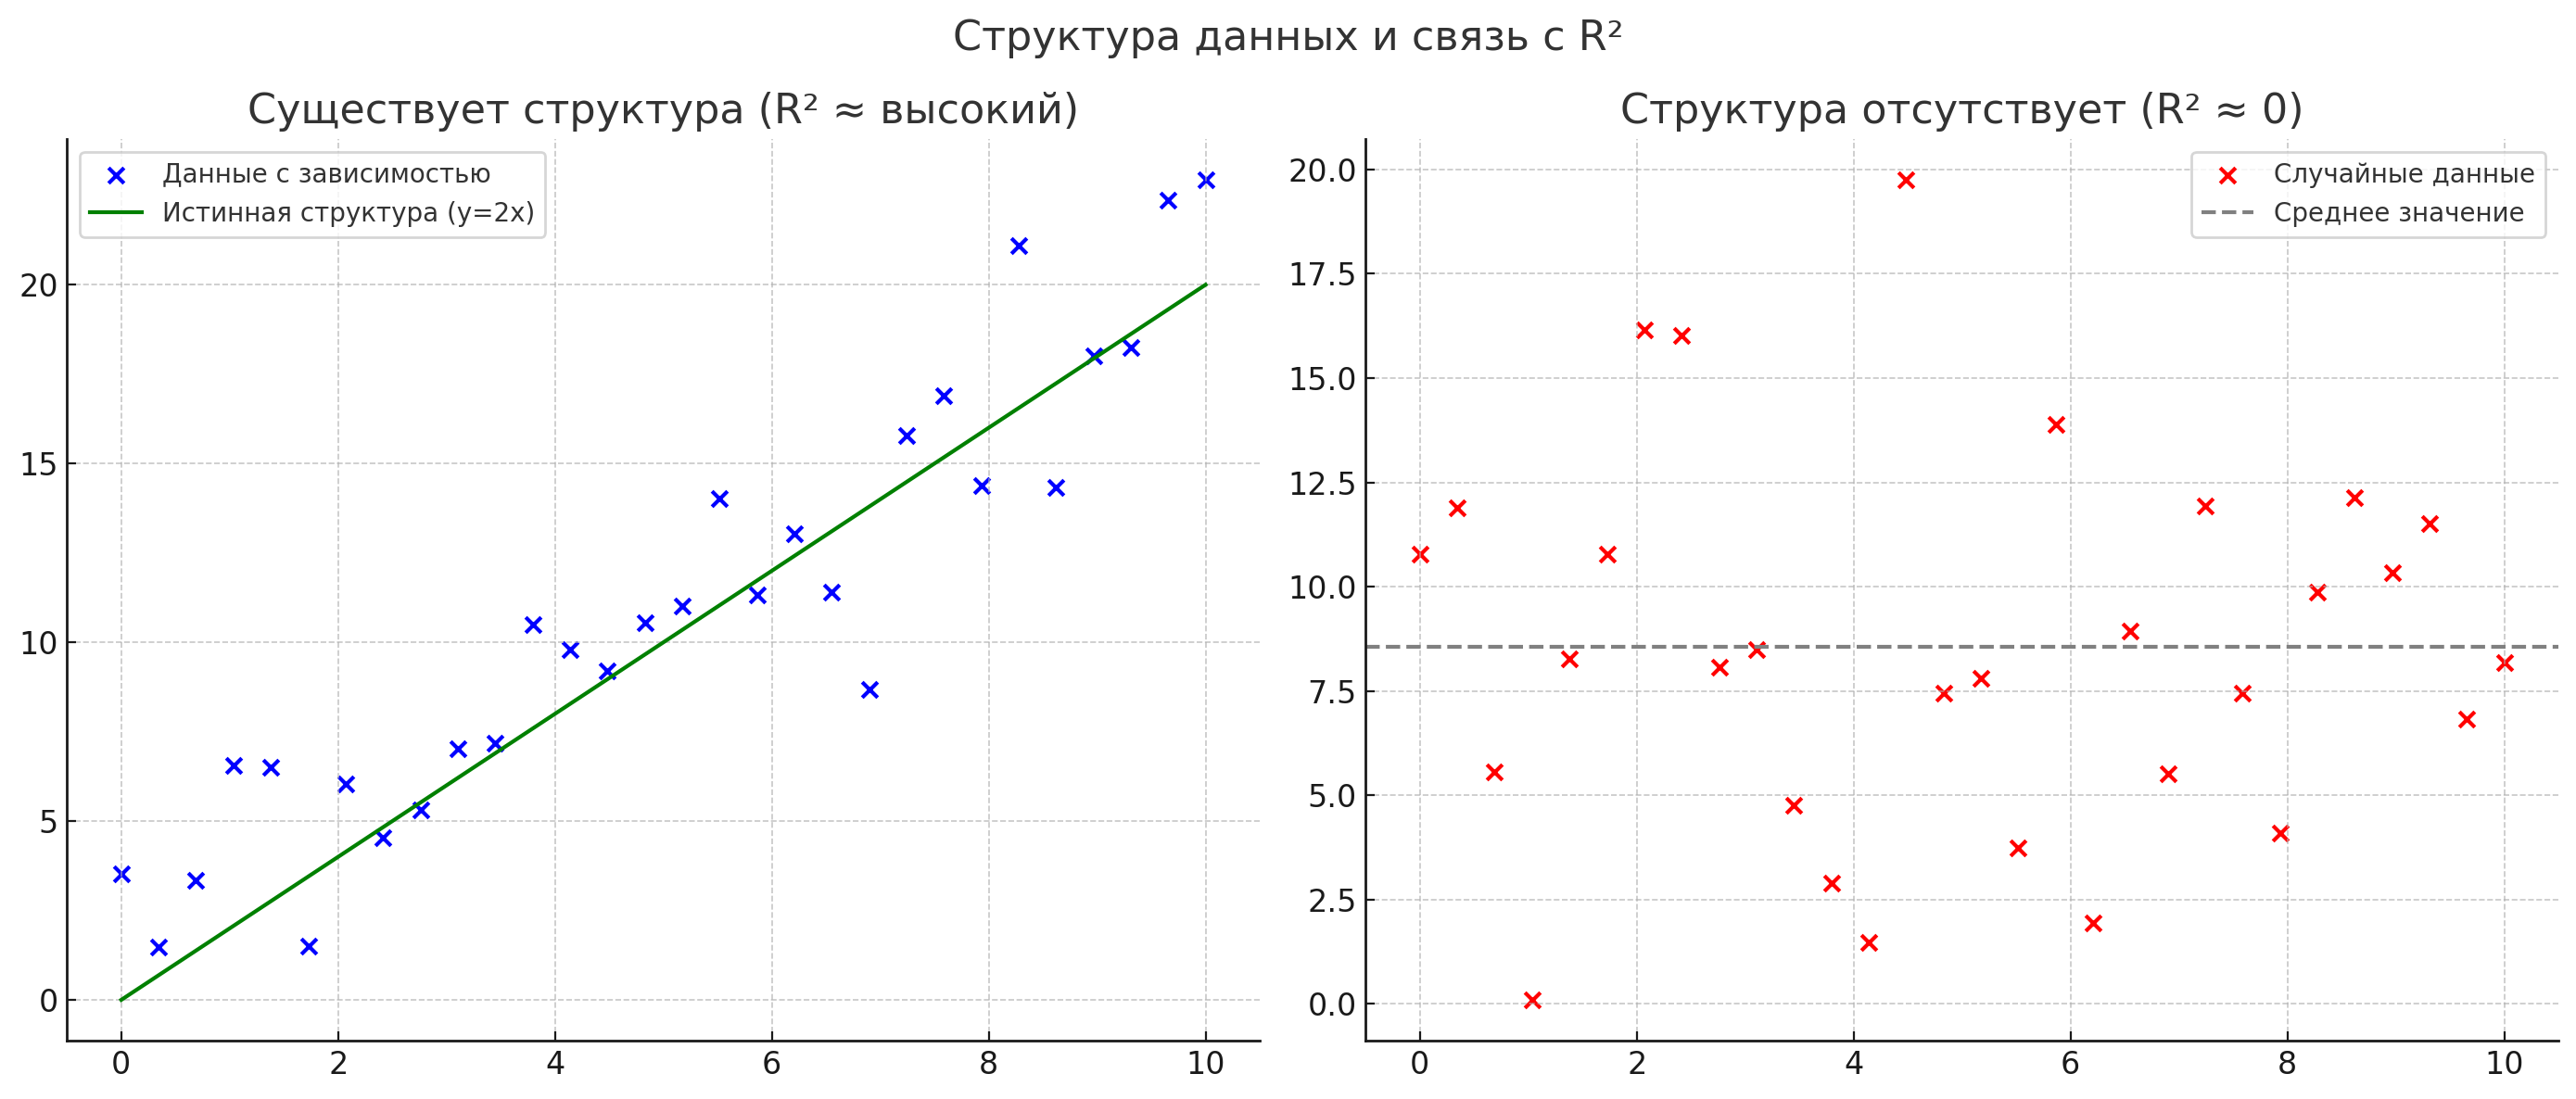

#### С использованием трехкратной перекрестной валидации

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
df = pd.read_csv("https://bit.ly/3C8JzrM", delimiter=",")

# Извлекаем входные переменные (все строки и все столбцы, кроме последнего столбца)
X = df.values[:, :-1]

# Извлекаем столбец с выходными значениями (все строки, только последний столбец)
Y = df.values[:, -1]

# Простая линейная регрессия
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

# Выводим результаты
print("Оценки R² на каждом фолде:", results)
print("Среднее R² = %.3f (ст. откл. = %.3f)" % (results.mean(), results.std()))

Оценки R² на каждом фолде: [0.86119665 0.78237719 0.85733887]
Среднее R² = 0.834 (ст. откл. = 0.036)
